<a href="https://colab.research.google.com/github/linson13/MY-PROJECTS/blob/main/DTC_on_purchase_logistic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

|--- Age <= 44.50
|   |--- Salary <= 90500.00
|   |   |--- Age <= 36.50
|   |   |   |--- class: 0
|   |   |--- Age >  36.50
|   |   |   |--- class: 0
|   |--- Salary >  90500.00
|   |   |--- Age <= 26.50
|   |   |   |--- class: 0
|   |   |--- Age >  26.50
|   |   |   |--- class: 1
|--- Age >  44.50
|   |--- Salary <= 41500.00
|   |   |--- Salary <= 22500.00
|   |   |   |--- class: 1
|   |   |--- Salary >  22500.00
|   |   |   |--- class: 1
|   |--- Salary >  41500.00
|   |   |--- Salary <= 85500.00
|   |   |   |--- class: 1
|   |   |--- Salary >  85500.00
|   |   |   |--- class: 1

Confusion matrix of DTC is 
 [[55  3]
 [ 1 21]] 

Accuracy score of DTC is 95.0 %



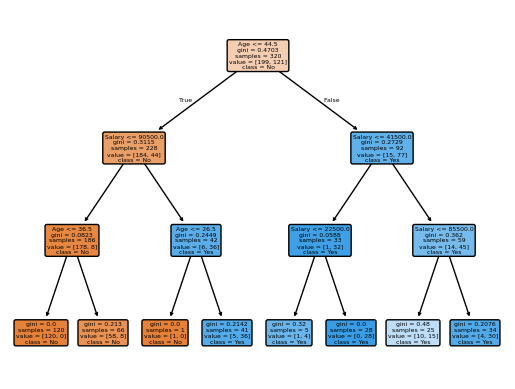

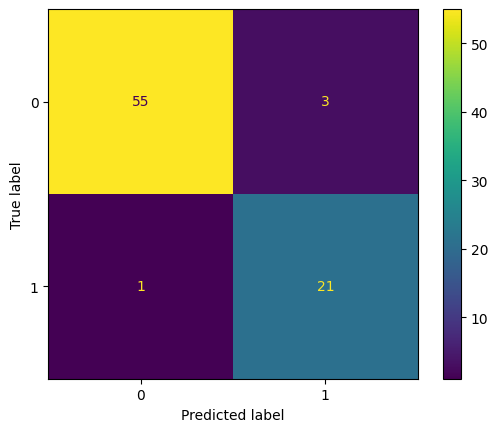

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score


purchaseData = pd.read_csv('/content/drive/MyDrive/IITK fiiles/Purchase_Logistic.csv')


#Dataset
#The dataset contains 400 entries for each of the features
#userId
#gender
#age
#estimatedsalary


#The target is
#purchased history
#The features taken into account are age and estimated salary which are
#required to predict if the user will purchase a new car (1=Yes, 0=No)


X = purchaseData.iloc[:, [2, 3]]
Y = purchaseData.iloc[:, 4]


Xtrain, Xtest, Ytrain, Ytest \
= train_test_split(X, Y, test_size = 0.2, random_state = 0)




cf=DecisionTreeClassifier(random_state=23,max_depth=3);
cf.fit(Xtrain,Ytrain)
Ypred=cf.predict(Xtest)
cmat=confusion_matrix(Ytest,Ypred)












decPlot = plot_tree(decision_tree=cf, feature_names = ["Age", "Salary"],
                     class_names =["No", "Yes"] , filled = True , precision = 4, rounded = True)


text_representation = tree.export_text(cf,  feature_names = ["Age","Salary"])
print(text_representation)




cmat = confusion_matrix(Ytest, Ypred)
print('Confusion matrix of DTC is \n',cmat,'\n')


disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()


DTCscore = accuracy_score(Ypred,Ytest)
print('Accuracy score of DTC is',100*DTCscore,'%\n')
